** ML MODEL FOR PREDICTING SALARY BASED ON YEARS OF EXPERIANCE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


step-1 read dataset

In [3]:

import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Salary_Dataset.csv")

In [4]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  32 non-null     float64
 1   Salary           32 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [6]:
df.shape  #static method that's why there is no need of paranthesis

(35, 2)

In [7]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


step-2 visualization

<function matplotlib.pyplot.show(*args, **kw)>

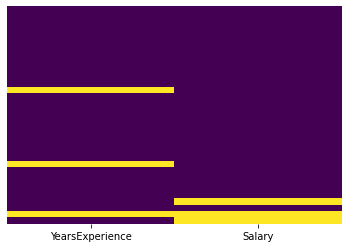

In [8]:

import seaborn as se
import matplotlib.pyplot as plt

def null_values(df):
  plt.figure(figsize=(6,4))
  se.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
  return plt.show

null_values(df)


step-3 pre-processing

In [9]:

#either deleting(huge data nobel method) or replacing
'''
to delete
df=df.dropna()
'''
#to replacing
m_v=df['YearsExperience'].median()    # to access column can also done with df.yearsExperiance
print(m_v)

4.7


In [10]:
me=df['Salary'].mean()
print(me)

76336.03125


In [11]:
import math
print(math.floor(df['Salary'].mean()))

76336


In [12]:
df['YearsExperience']=df['YearsExperience'].fillna(m_v) #replacing Nan values

In [13]:
df['Salary']=df['Salary'].fillna(me)

<function matplotlib.pyplot.show(*args, **kw)>

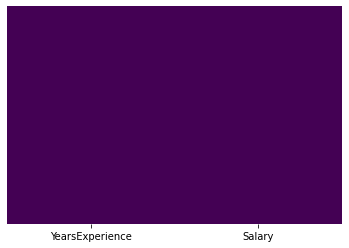

In [14]:
import seaborn as se
import matplotlib.pyplot as plt

def null_values(df):
  plt.figure(figsize=(6,4))
  se.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
  return plt.show

null_values(df)


step-4 preparing dataset

In [15]:

#x-Independent variable - YearsExperiance
#y - Dependent Variable - Salary
'''
x=df['YearsExperience']
y=df['Salary']
'''
#dataframe should be in 2D array
x=df.iloc[:,:-1].values
y=df.iloc[:,1:].values


In [16]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.7],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 4.7],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [ 9. ],
       [ 4. ],
       [ 4.1],
       [ 4.7],
       [ 9.5]])

In [17]:
y

array([[ 39343.     ],
       [ 46205.     ],
       [ 37731.     ],
       [ 43525.     ],
       [ 39891.     ],
       [ 56642.     ],
       [ 60150.     ],
       [ 54445.     ],
       [ 64445.     ],
       [ 57189.     ],
       [ 63218.     ],
       [ 55794.     ],
       [ 56957.     ],
       [ 57081.     ],
       [ 61111.     ],
       [ 67938.     ],
       [ 66029.     ],
       [ 83088.     ],
       [ 81363.     ],
       [ 93940.     ],
       [ 91738.     ],
       [ 98273.     ],
       [101302.     ],
       [113812.     ],
       [109431.     ],
       [105582.     ],
       [116969.     ],
       [112635.     ],
       [122391.     ],
       [121872.     ],
       [105582.     ],
       [ 76336.03125],
       [ 57081.     ],
       [ 76336.03125],
       [ 76336.03125]])

step-5 splitting the dataset

In [18]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
X_train

array([[9.5],
       [4.1],
       [9.5],
       [9. ],
       [3.2],
       [4.7],
       [2.9],
       [5.3],
       [4.5],
       [4. ],
       [8.7],
       [1.3],
       [4. ],
       [3. ],
       [8.2],
       [2.2],
       [5.9],
       [7.1],
       [6. ],
       [3.7],
       [3.2],
       [4.7],
       [2. ],
       [1.1]])

In [20]:
X_test

array([[10.5],
       [ 6.8],
       [ 5.1],
       [10.3],
       [ 7.9],
       [ 4.9],
       [ 3.9],
       [ 1.5],
       [ 4. ],
       [ 9.6],
       [ 4.7]])

In [21]:
Y_train

array([[ 76336.03125],
       [ 57081.     ],
       [116969.     ],
       [105582.     ],
       [ 64445.     ],
       [ 57081.     ],
       [ 56642.     ],
       [ 83088.     ],
       [ 61111.     ],
       [ 76336.03125],
       [109431.     ],
       [ 46205.     ],
       [ 56957.     ],
       [ 60150.     ],
       [113812.     ],
       [ 39891.     ],
       [ 81363.     ],
       [ 98273.     ],
       [ 93940.     ],
       [ 57189.     ],
       [ 54445.     ],
       [ 76336.03125],
       [ 43525.     ],
       [ 39343.     ]])

In [22]:
Y_test

array([[121872.],
       [ 91738.],
       [ 66029.],
       [122391.],
       [101302.],
       [ 67938.],
       [ 63218.],
       [ 37731.],
       [ 55794.],
       [112635.],
       [105582.]])

step-6 Trainig -- fitting algorithm

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

Fitting Algorithm Training

In [24]:
model.fit(X_train,Y_train)

LinearRegression()

step-7 Testing 

In [25]:
y_pred=model.predict(X_test)

step-8 Model Evaluation

Text(0.5, 1.0, 'ML MODEL')

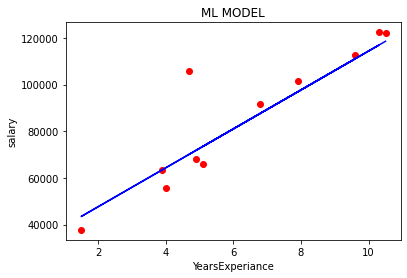

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X_test,Y_test,color="red")
plt.plot(X_test,y_pred,color="blue")
plt.xlabel("YearsExperiance")
plt.ylabel("salary")
plt.title("ML MODEL")

Text(0.5, 1.0, 'ML MODEL')

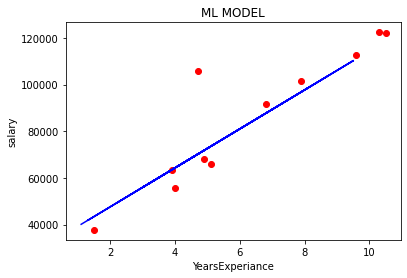

In [28]:
import matplotlib.pyplot as plt
plt.scatter(X_test,Y_test,color="red")
plt.plot(X_train,model.predict(X_train),color="blue")
plt.xlabel("YearsExperiance")
plt.ylabel("salary")
plt.title("ML MODEL")

ACCURACY

In [29]:
accuracy=model.score(X_test,Y_test)
print(accuracy)

0.8212076975843867


In [30]:
print(model.score(X_train,Y_train)*100)

80.98160431305374


In [31]:
import math
year=float(input("enter the year"))
print(math.floor(model.predict([[year]])))

enter the year6
81001
